# Лабораторная работа №4 

## Задание 2.

### 2.1 Инициализация проекта. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../data/weatherAUS.csv')

### 2.2 Исследование исходных данных и предобработка.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)
    elif data[column].dtype == 'float64':
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [6]:
data["Temp9am"].unique()

array([16.9       , 17.2       , 21.        , 18.1       , 17.8       ,
       20.6       , 16.3       , 18.3       , 20.1       , 20.4       ,
       15.9       , 17.4       , 15.8       , 17.3       , 18.        ,
       15.5       , 19.1       , 24.5       , 23.8       , 20.9       ,
       21.5       , 23.2       , 26.6       , 24.6       , 21.6       ,
       12.5       , 19.7       , 14.9       , 17.1       , 20.7       ,
       22.4       , 23.1       , 25.2       , 17.9       , 20.2       ,
       22.8       , 24.2       , 24.3       , 25.6       , 27.6       ,
       16.        , 22.        , 26.8       , 27.3       , 26.1       ,
       23.3       , 21.2       , 23.4       , 25.8       , 28.2       ,
       29.        , 29.2       , 29.9       , 32.4       , 28.8       ,
       27.2       , 25.5       , 26.5       , 28.7       , 29.6       ,
       34.5       , 18.7       , 16.7       , 17.        , 19.2       ,
       21.4       , 22.1       , 19.3       , 15.        , 20.  

In [7]:
for ind, value in enumerate(data["Temp9am"]):
    clean = str(value).replace('.', '')
    data.at[ind, 'Temp9am'] = int(clean)

In [8]:
data["Temp9am"].unique()

array([ 1.69000000e+02,  1.72000000e+02,  2.10000000e+02,  1.81000000e+02,
        1.78000000e+02,  2.06000000e+02,  1.63000000e+02,  1.83000000e+02,
        2.01000000e+02,  2.04000000e+02,  1.59000000e+02,  1.74000000e+02,
        1.58000000e+02,  1.73000000e+02,  1.80000000e+02,  1.55000000e+02,
        1.91000000e+02,  2.45000000e+02,  2.38000000e+02,  2.09000000e+02,
        2.15000000e+02,  2.32000000e+02,  2.66000000e+02,  2.46000000e+02,
        2.16000000e+02,  1.25000000e+02,  1.97000000e+02,  1.49000000e+02,
        1.71000000e+02,  2.07000000e+02,  2.24000000e+02,  2.31000000e+02,
        2.52000000e+02,  1.79000000e+02,  2.02000000e+02,  2.28000000e+02,
        2.42000000e+02,  2.43000000e+02,  2.56000000e+02,  2.76000000e+02,
        1.60000000e+02,  2.20000000e+02,  2.68000000e+02,  2.73000000e+02,
        2.61000000e+02,  2.33000000e+02,  2.12000000e+02,  2.34000000e+02,
        2.58000000e+02,  2.82000000e+02,  2.90000000e+02,  2.92000000e+02,
        2.99000000e+02,  

### 2.3 Разбиение датафрейма на обучающую и тестовую выборки.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [11]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [12]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
data['Location'] = pd.Categorical(data['Location']).codes
data['WindGustDir'] = pd.Categorical(data['WindGustDir']).codes
data['WindDir9am'] = pd.Categorical(data['WindDir9am']).codes
data['WindDir3pm'] = pd.Categorical(data['WindDir3pm']).codes
data['RainToday'] = pd.Categorical(data['RainToday']).codes
data['RainTomorrow'] = pd.Categorical(data['RainTomorrow']).codes

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  int8   
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int8   
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int8   
 10  WindDir3pm     145460 non-null  int8   
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [15]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
y = data['RainTomorrow']
X = data.drop(['RainTomorrow'],axis = 1)

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

ValueError: could not convert string to float: '2008-12-01'

In [18]:
X[y==0].shape

(113583, 22)

In [19]:
X[y==1].shape

(31877, 22)

In [18]:
!pip install imblearn

In [19]:
from imblearn.under_sampling import RandomUnderSampler

Russia = RandomUnderSampler()
X_res, y_res = Russia.fit_resample(X, y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

NameError: name 'train_test_split' is not defined

### 2.4 Logistic Regression.

In [21]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

In [180]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6241
           1       0.80      0.76      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

Predicted labels:  [1 1 0 ... 1 1 1]
F1-score:  0.7805684591764427


0.7818596044048437


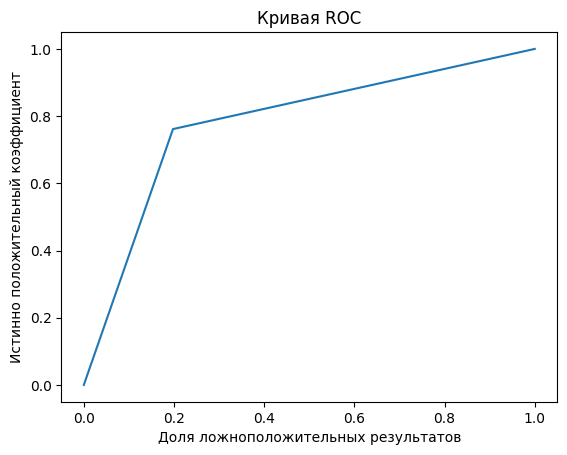

In [207]:
print(roc_auc_score(y_test, predictions))

fpr, tpr, plot = roc_curve(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

### 2.5 k-NN

In [23]:
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [188]:
knn_params = {'n_neighbors': range(1, 51)}

In [189]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

In [190]:
knn_grid = GridSearchCV(knn,
                              knn_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [192]:
knn_grid.best_params_

{'n_neighbors': 35}

In [193]:
knn_grid.best_score_

0.7785424381692682

In [197]:
predictions_knn = knn_grid.predict(X_test)
print(classification_report(y_test, predictions_knn))
print('Predicted labels: ', predictions_knn)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6241
           1       0.80      0.76      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

Predicted labels:  [1 1 0 ... 1 1 1]


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(roc_auc_score(y_test, predictions_knn))

fpr, tpr, plot = roc_curve(y_test, predictions_knn)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

NameError: name 'y_test' is not defined

### 2.6 Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions_gnb= gnb.predict(X_test)
accuracy_score(y_test, predictions_gnb)

NameError: name 'X_train' is not defined

In [32]:
predictions_gnb= gnb.predict(X_test)
print(classification_report(y_test, predictions_gnb))
print('Predicted labels: ', predictions_gnb)

NameError: name 'X_test' is not defined

0.7520440617284588


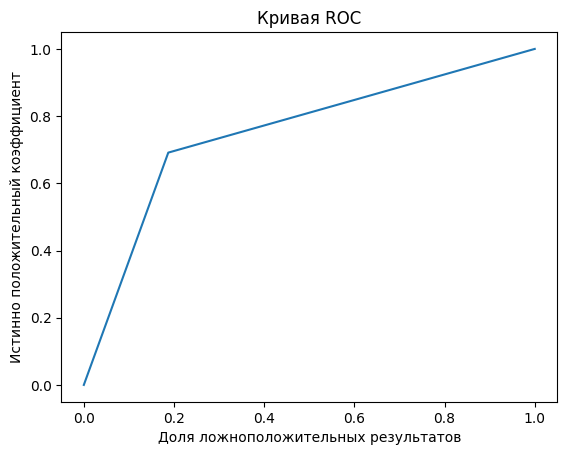

In [206]:
print(roc_auc_score(y_test, predictions_gnb))

fpr, tpr, plot = roc_curve(y_test, predictions_gnb)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

### 2.7 SVM

In [28]:
from sklearn import svm

In [213]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

predictions_svm = SVM.predict(X_test)
accuracy_score(y_test, predictions_svm)

0.8000941102658615

In [212]:
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      6241
           1       0.82      0.79      0.80      6510

    accuracy                           0.80     12751
   macro avg       0.80      0.80      0.80     12751
weighted avg       0.80      0.80      0.80     12751



0.8004106312475526


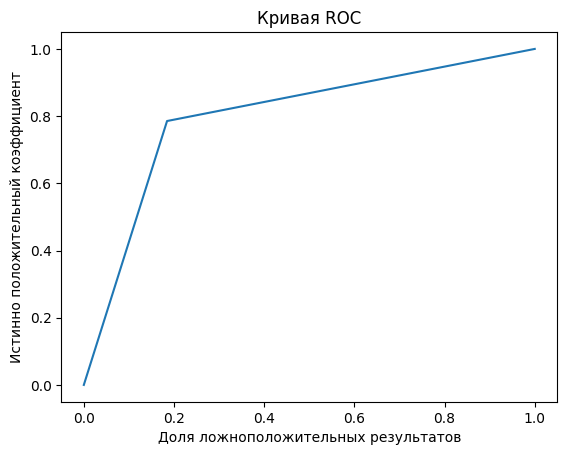

In [216]:
print(roc_auc_score(y_test, predictions_svm))

fpr, tpr, plot = roc_curve(y_test, predictions_svm)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

### 2.8 Построение итоговой модели классификатора 

In [218]:
classifiers = {
    'Logistic Regression': model,
    'KNN classifier': knn_grid,
    'Naive Bayes' : gnb,
    'SVM': SVM
}

In [219]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Logistic Regression: 78.1% 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6241
           1       0.80      0.76      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

Accuracy (train) for KNN classifier: 78.3% 
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6241
           1       0.80      0.76      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

Accuracy (train) for Naive Bayes: 75.1% 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      6241
           1       0.79      0.69      0.74      6510

    accuracy                           0.75     

## Задание 3. 